In [28]:
import numpy as np
import pandas as pd
import tensorflow_probability as tfp
tfd = tfp.distributions

In [12]:
# Data Viz. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100


Bad key "text.kerning_factor" on line 4 in
/home/kevin/anaconda3/envs/py3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


There are two ways that we can plot the graphs using tfd:

**1) sample**

In [51]:
normal = tfd.Normal(loc=0.0, scale=1.0)
gamma = tfd.Gamma(concentration=5.0, rate=1.0)
poisson = tfd.Poisson(rate=2.0)
laplace = tfd.Laplace(loc=0.0, scale=1.0)
student = tfd.StudentT(df=999, loc=0.0, scale=1.0)

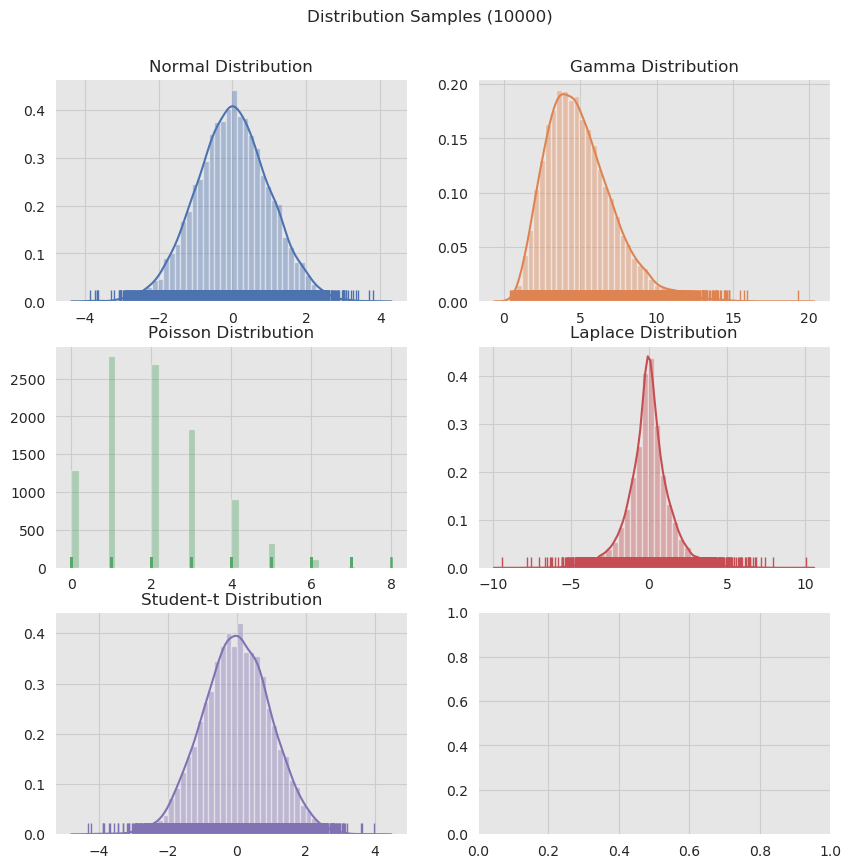

In [52]:
n_samples = 10000
t_samples = 30

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

axes = axes.flatten()

sns.distplot(a=normal.sample(n_samples), color=sns_c[0], rug=True, ax=axes[0])
axes[0].set(title=f'Normal Distribution')

sns.distplot(a=gamma.sample(n_samples), color=sns_c[1], rug=True, ax=axes[1])
axes[1].set(title=f'Gamma Distribution');

sns.distplot(a=poisson.sample(n_samples), color=sns_c[2], kde=False, rug=True, ax=axes[2])
axes[2].set(title='Poisson Distribution');

sns.distplot(a=laplace.sample(n_samples), color=sns_c[3], rug=True, ax=axes[3])
axes[3].set(title='Laplace Distribution')

sns.distplot(a=student.sample(n_samples), color=sns_c[4], rug=True, ax=axes[4])
axes[4].set(title='Student-t Distribution')

plt.suptitle(f'Distribution Samples ({n_samples})', y=0.95);

In [19]:
normal.sample(n_samples)

<tf.Tensor: shape=(800,), dtype=float32, numpy=
array([ 0.58632916,  0.44886234,  1.1593757 ,  2.7252877 , -1.0160216 ,
        0.4108474 , -1.4528791 , -0.20742074,  1.1401682 ,  0.63349795,
       -0.86845744,  0.12543617,  1.6409445 ,  0.92113245, -1.6681615 ,
       -0.63959587, -1.6747763 ,  1.0258744 , -0.562113  , -0.8302153 ,
       -0.32673782,  0.27972767, -0.2652347 ,  0.4085353 ,  0.57935345,
        0.4035159 , -1.1250366 , -0.8779561 ,  1.2518668 ,  0.09802628,
       -1.6028951 ,  0.6523763 ,  0.06284134,  1.0281788 ,  1.1753412 ,
       -0.42869988, -0.33542144, -0.5686973 , -1.9874806 , -1.2054508 ,
       -2.3027759 , -0.07979198,  0.11859907, -1.1255908 , -0.2370955 ,
        0.4988427 , -1.246489  , -0.593468  ,  1.4753556 , -0.13688245,
       -0.24836639, -0.17671715,  0.24113387,  0.7139849 ,  0.29391867,
       -1.235875  ,  0.49212548, -0.6401525 , -0.6105381 , -0.24919574,
        0.45986262,  1.2092683 ,  0.4216282 ,  0.16083688, -0.08785161,
        1.097   

**2) prob or log_prob** 

In [29]:
X = np.linspace(-10, 10, 1000)

In [53]:
normal_y = normal.prob(X)
gamma_y = gamma.prob(X)
poisson_y = poisson.prob(X)
laplace_y = laplace.prob(X)
student_y = student.prob(X)

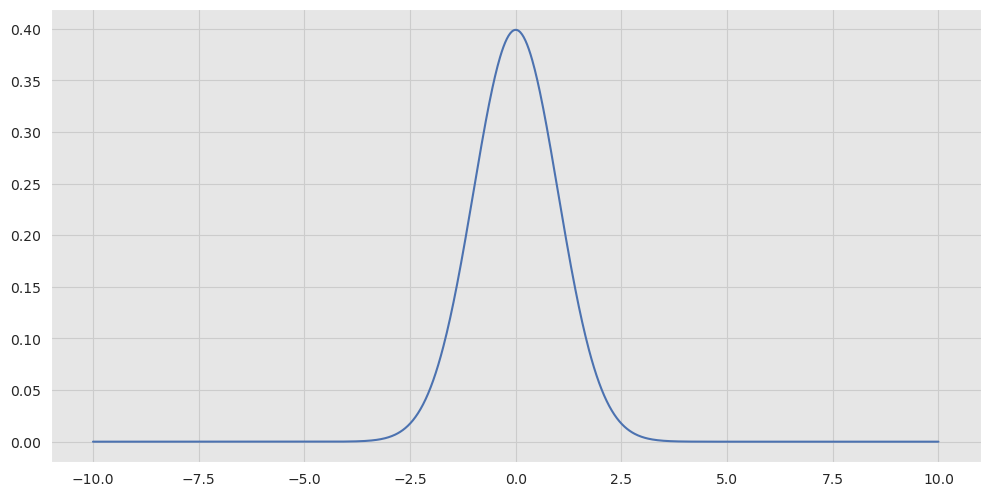

In [40]:
plt.plot(X, normal_y);

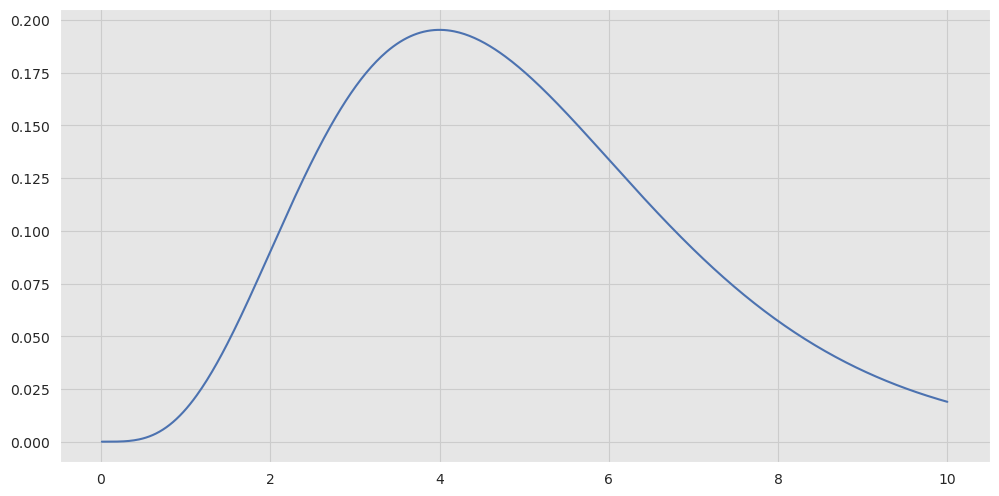

In [41]:
plt.plot(X, gamma_y);

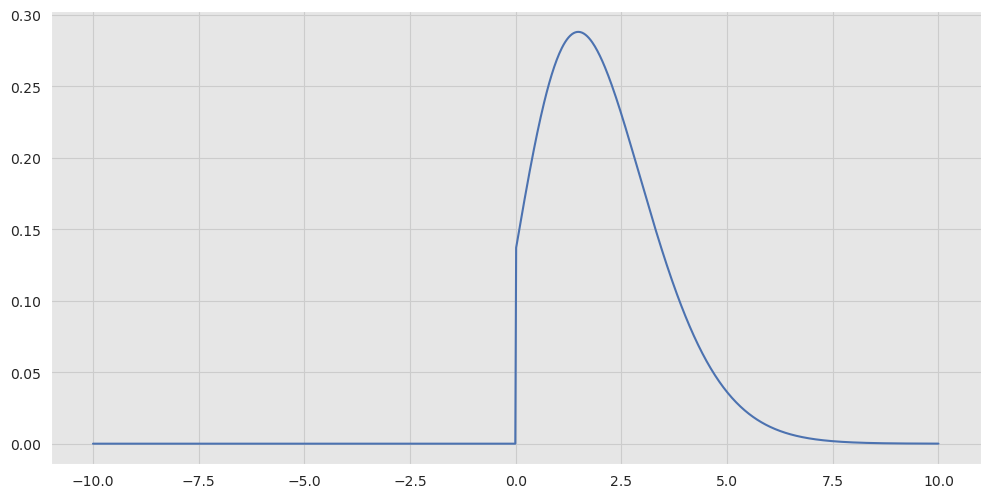

In [42]:
plt.plot(X, poisson_y);

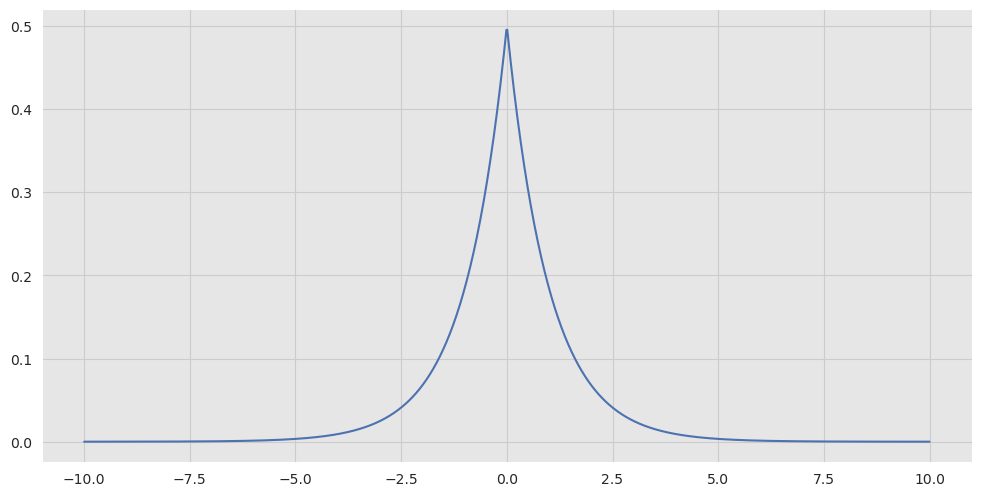

In [43]:
plt.plot(X, laplace_y);

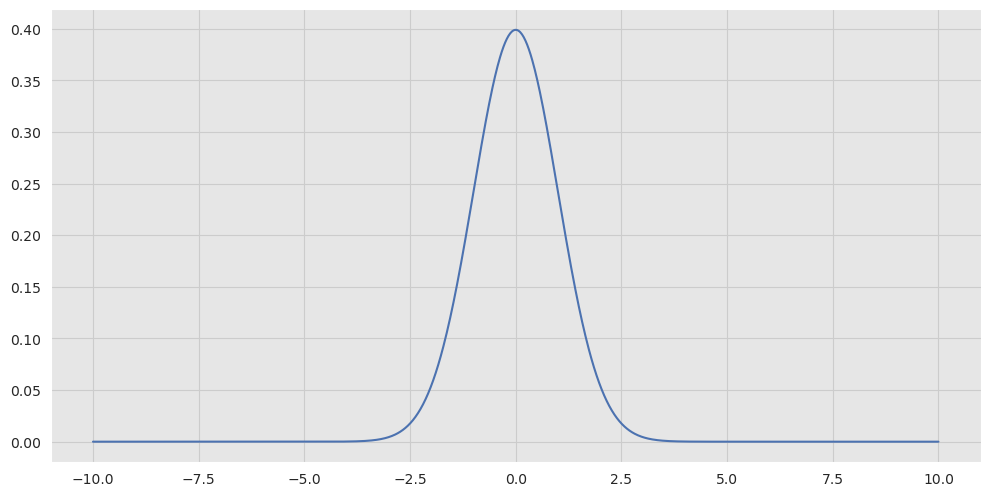

In [54]:
plt.plot(X, student_y);

**Multivariate Gaussian**

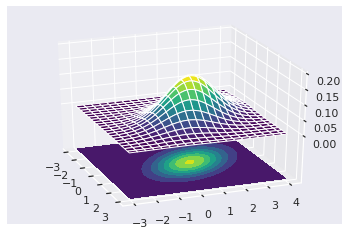

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

{\displaystyle g(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\exp {\left(-{\frac {1}{2}}{\frac {(x-\mu )^{2}}{\sigma ^{2}}}\right)}.}

$e^{i\pi} + 1 = 0$

$e^{i\pi} + 1 = 0$

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$